In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [3]:
 # 1) Load & preprocess MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Add channel dimension -> (28,28,1)
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

# One-hot labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
 # 2) Build CNN model (given architecture)
num_classes = 10
img_size = (28, 28, 1)

inputs = Input(img_size)
x = Conv2D(8,  (3,3), activation='relu')(inputs)
x = Conv2D(16, (3,3), activation='relu')(x)
x = Conv2D(32, (3,3), activation='relu')(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(64,  activation='relu')(x)
x = Dense(32,  activation='relu')(x)
x = Dense(16,  activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 22, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,982,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,999,514 (7.63 MB)

 Trainable params: 1,999,514 (7.63 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# 3) Compile
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [6]:
# 4) Train
history = model.fit(
    x_train, y_train_cat,
    validation_split=0.1,
    epochs=6,
    batch_size=128,
    verbose=2
)


Epoch 1/6
422/422 - 12s - 28ms/step - accuracy: 0.9060 - loss: 0.3120 - val_accuracy: 0.9777 - val_loss: 0.0817
Epoch 2/6
422/422 - 2s - 5ms/step - accuracy: 0.9802 - loss: 0.0676 - val_accuracy: 0.9832 - val_loss: 0.0661
Epoch 3/6
422/422 - 2s - 5ms/step - accuracy: 0.9872 - loss: 0.0421 - val_accuracy: 0.9863 - val_loss: 0.0516
Epoch 4/6
422/422 - 2s - 5ms/step - accuracy: 0.9908 - loss: 0.0306 - val_accuracy: 0.9908 - val_loss: 0.0407
Epoch 5/6
422/422 - 3s - 7ms/step - accuracy: 0.9935 - loss: 0.0216 - val_accuracy: 0.9888 - val_loss: 0.0425
Epoch 6/6
422/422 - 2s - 5ms/step - accuracy: 0.9952 - loss: 0.0156 - val_accuracy: 0.9868 - val_loss: 0.0531


In [7]:
# 5) Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f} | Test loss: {test_loss:.4f}")


Test accuracy: 0.9874 | Test loss: 0.0451


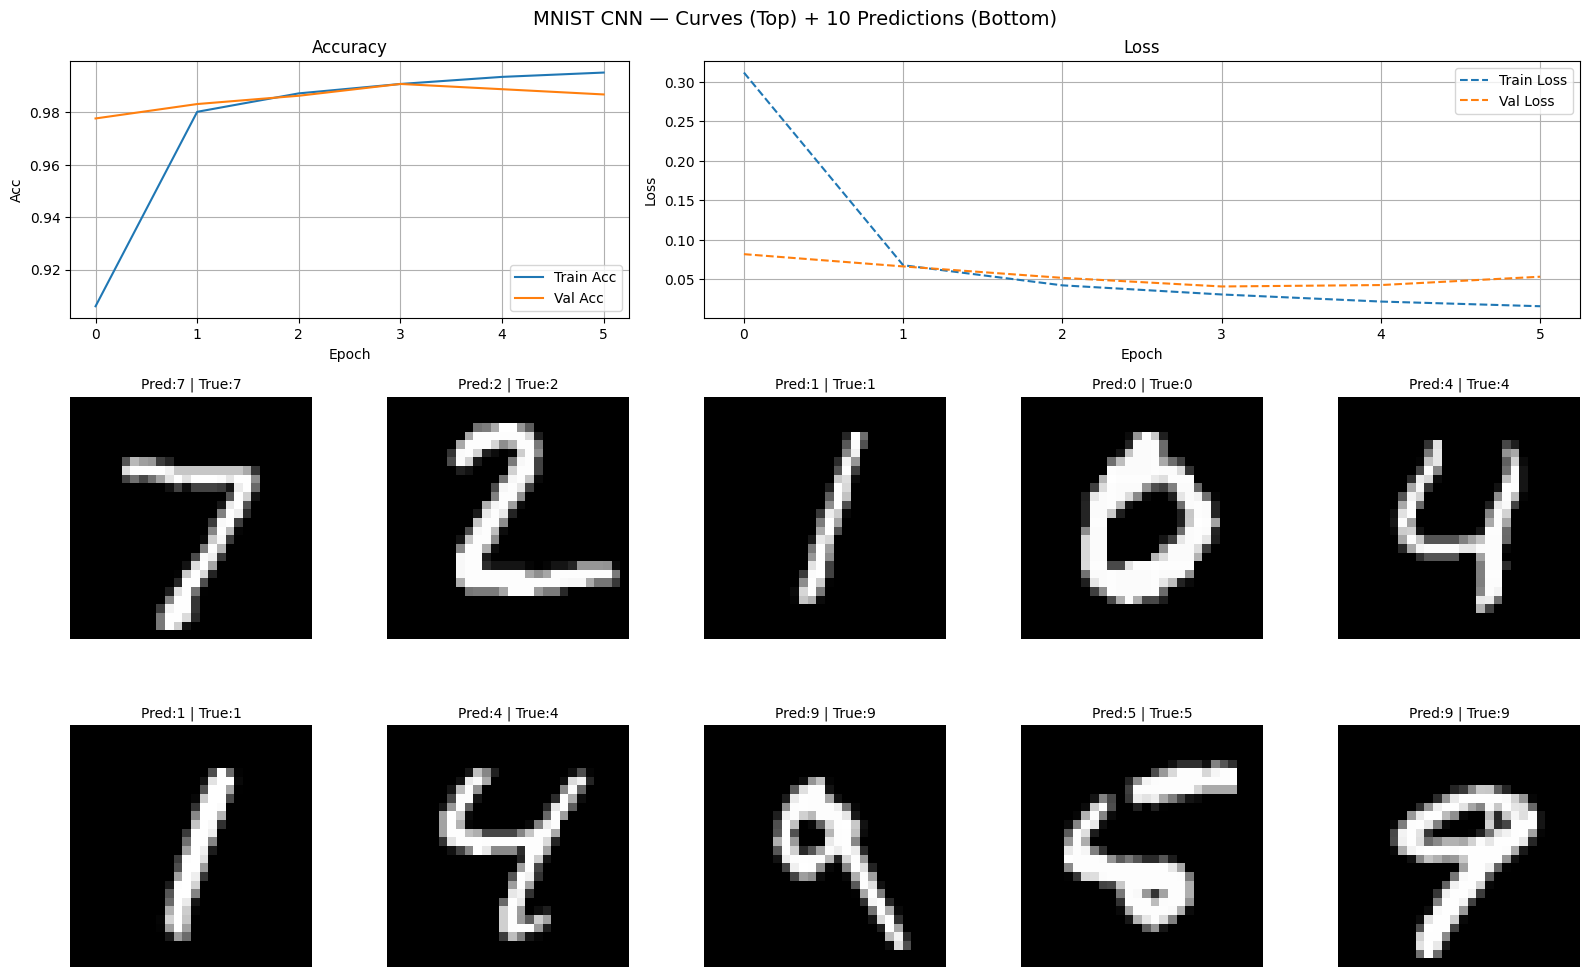

In [8]:
# ---- Simple ONE-FIG layout: TL=Acc, TR=Loss, Bottom=10 preds ----
import matplotlib.pyplot as plt

imgs   = x_test[:10]
labels = y_test[:10]
preds  = model.predict(imgs, verbose=0).argmax(1)

from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(16,10))
gs  = GridSpec(3, 5, figure=fig)


ax_acc  = fig.add_subplot(gs[0, 0:2])
ax_acc.plot(history.history['accuracy'], label='Train Acc')
ax_acc.plot(history.history['val_accuracy'], label='Val Acc')
ax_acc.set_title('Accuracy'); ax_acc.set_xlabel('Epoch'); ax_acc.set_ylabel('Acc')
ax_acc.legend(); ax_acc.grid(True)

# Top-Right: Loss (row 0, col 2-4)
ax_loss = fig.add_subplot(gs[0, 2:5])
ax_loss.plot(history.history['loss'], '--', label='Train Loss')
ax_loss.plot(history.history['val_loss'], '--', label='Val Loss')
ax_loss.set_title('Loss'); ax_loss.set_xlabel('Epoch'); ax_loss.set_ylabel('Loss')
ax_loss.legend(); ax_loss.grid(True)


for i in range(10):
    r = 1 + i // 5
    c = i % 5
    ax = fig.add_subplot(gs[r, c])
    ax.imshow(imgs[i].reshape(28,28), cmap='gray')
    ax.set_title(f"Pred:{preds[i]} | True:{labels[i]}", fontsize=10)
    ax.axis('off')

plt.suptitle("MNIST CNN — Curves (Top) + 10 Predictions (Bottom)", fontsize=14, y=0.98)
plt.tight_layout()
plt.show()